In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import math 

In [7]:
import seaborn as sns

In [15]:
data = pd.read_csv('galaxy1.csv', sep = ',')

In [16]:
print  data

       GalaxyID         GroupID  SnapNum  Redshift  CentreOfMass_x  \
0      21379523  26000000000000       26   0.18271        5.927712   
1      21730537  26000000000003       26   0.18271       52.264893   
2      21242352  26000000000004       26   0.18271       10.774976   
3      21573588  26000000000002       26   0.18271        9.288896   
4      21109762  26000000000001       26   0.18271       18.618362   
5      21986363  26000000000006       26   0.18271       75.968440   
6      19701411  26000000000008       26   0.18271       84.766710   
7      20099627  26000000000009       26   0.18271       88.179460   
8      20163970  26000000000011       26   0.18271       54.217976   
9      18544430  26000000000000       26   0.18271        1.646505   
10     19634931  26000000000010       26   0.18271       72.937740   
11     18481116  26000000000001       26   0.18271       15.743982   
12     20867357  26000000000014       26   0.18271       36.935287   
13     20574263  260

In [17]:
SFR = data['StarFormationRate']
Staller_mass = data['MassType_Star']
SSFR = SFR*1. / Staller_mass

In [18]:
mask = SSFR != 0
SSFR = SSFR[mask]
Staller_mass = Staller_mass[mask]
log_mstar = np.log10(Staller_mass)
log_SSFR = np.log10(SSFR)

In [19]:
SSFR != 0
print SSFR

0        3.221160e-11
1        2.300770e-11
2        1.899070e-11
3        5.480707e-11
4        1.383649e-11
5        5.948051e-12
6        2.168663e-11
7        3.018828e-11
8        6.304347e-12
9        1.259791e-11
10       2.067601e-11
11       6.090601e-12
12       4.657881e-12
13       6.510497e-12
14       6.145914e-12
15       1.872562e-11
16       4.279668e-11
17       1.896804e-11
18       4.176915e-11
19       2.874997e-12
20       1.057404e-11
21       2.860112e-11
22       4.511025e-11
23       4.235726e-11
24       2.643865e-12
25       4.704004e-12
26       3.425377e-11
27       2.307677e-11
28       2.825060e-11
29       2.949892e-11
             ...     
99727    1.468685e-10
99730    9.953645e-11
99734    5.824661e-10
99735    1.846751e-10
99738    2.606587e-10
99740    2.292702e-10
99753    2.423824e-10
99758    3.372477e-11
99774    2.686559e-10
99781    8.512699e-10
99797    1.383737e-10
99804    1.115781e-10
99811    3.490597e-11
99831    1.228699e-09
99832    5

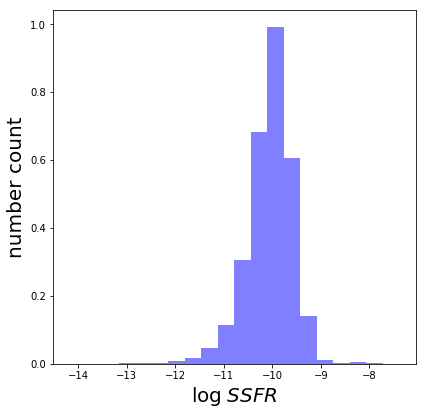

In [20]:
plt.figure(figsize=(6.5,6.5))
plt.hist(log_SSFR, bins = 20, normed = True, color = "b", alpha = .5)
plt.xlabel(r"$\log \; SSFR$", fontsize = 20)
plt.ylabel("number count", fontsize= 20)
plt.show()

In [21]:
def binned_hist(logm_min, logm_max):
    """
    this function returns histogram of SSFR in bins of stellar mass
    """
    star_mask = (log_mstar>logm_min)&(log_mstar<logm_max)
    plt.figure(figsize=(6,6))
    plt.hist(log_SSFR[star_mask], bins = 20, normed = True, color = "b", alpha = .5)
    plt.xlabel(r"$\log \; SSFR$", fontsize = 20)
    plt.ylabel("number count", fontsize= 20)
    plt.show()

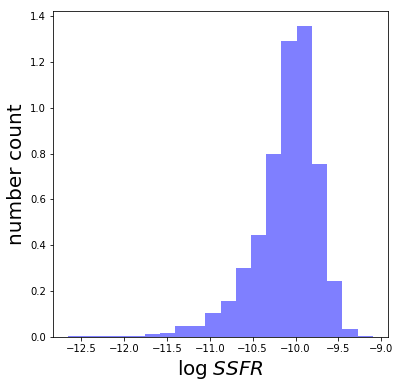

In [22]:
binned_hist(9.6, 10)

In [23]:
def binned_hist(logm_min, logm_max):
    """
    this function returns histogram of SSFR in bins of stellar mass
    """
    star_mask = (log_mstar>logm_min)&(log_mstar<logm_max)
    plt.figure(figsize=(6,6))
    plt.hist(log_SSFR[star_mask], bins = 15, normed = True, color = "r", alpha = .5)
    plt.xlabel(r"$\log \; SSFR$", fontsize = 20)
    plt.ylabel("number count", fontsize= 20)
    plt.show()

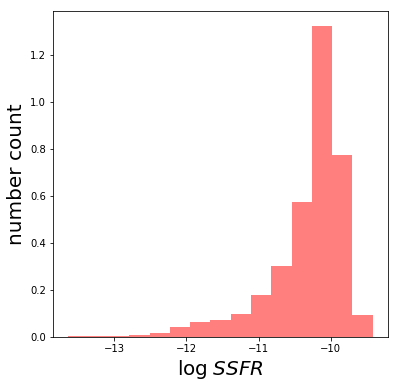

In [24]:
binned_hist(10, 10.5)

In [25]:
def binned_hist(logm_min, logm_max):
    """
    this function returns histogram of SSFR in bins of stellar mass
    """
    star_mask = (log_mstar>logm_min)&(log_mstar<logm_max)
    plt.figure(figsize=(6,6))
    plt.hist(log_SSFR[star_mask], bins = 15, normed = True, color = "b", alpha = .5)
    plt.xlabel(r"$\log \; SSFR$", fontsize = 20)
    plt.ylabel("number count", fontsize= 20)
    plt.show()
    plt.close()    

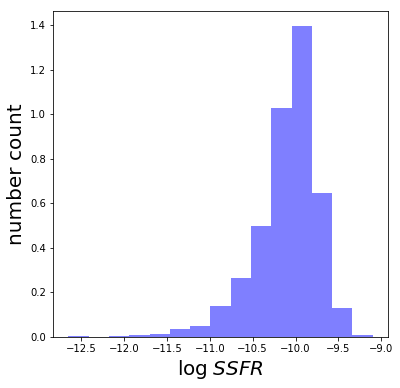

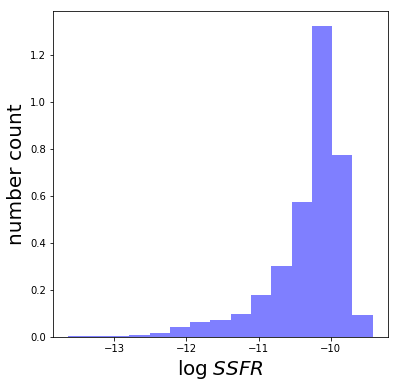

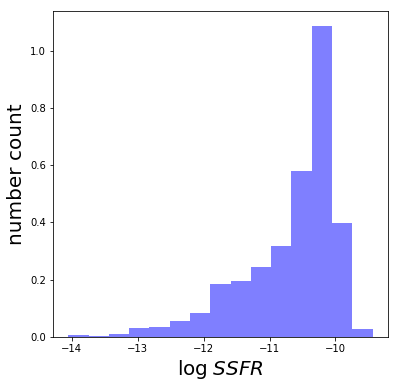

In [26]:
plt.close()
list = [[9.5,10],[10,10.5], [10.5,11]]
for i in list :
        binned_hist(i[0],i[1])
        

In [27]:
meadian = np.median(log_SSFR)

In [34]:
def binned_hist_median(logm_min, logm_max):
    """
    this function returns histogram of SSFR in bins of stellar mass
    """
    star_mask = (log_mstar>logm_min)&(log_mstar<logm_max)
    
    log_SSFR_new = log_SSFR[star_mask]
    minum = log_SSFR
    med =np.median(log_SSFR_new)
    mask = log_SSFR_new > med
    
    plt.figure(figsize=(6,6))
    plt.hist(log_SSFR_new[mask], bins = 15, normed = True, color = "b", alpha = .5)
    plt.hist(log_SSFR_new[~mask], bins = 15, normed = True, color = "r", alpha = .5)
    plt.title(str(logm_min)+'<logM<'+str(logm_max), fontsize=20)
    plt.xlabel(r"$\log \; SSFR$", fontsize = 20)
    plt.ylabel("number count", fontsize= 20)
    plt.xlim(-14,-8)
    plt.savefig("binned_hist_median"+str(logm_min)+"_"+str(logm_max)+".pdf")
    plt.show()

    plt.close()    

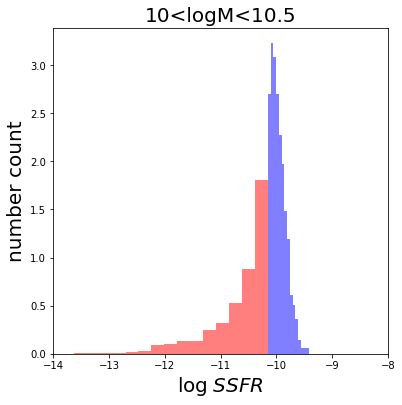

In [35]:
binned_hist_median(10,10.5)

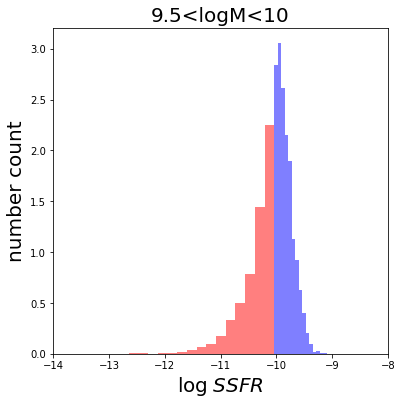

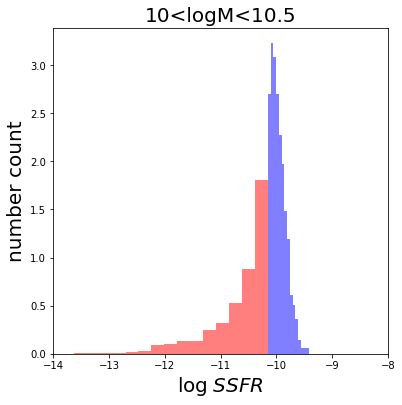

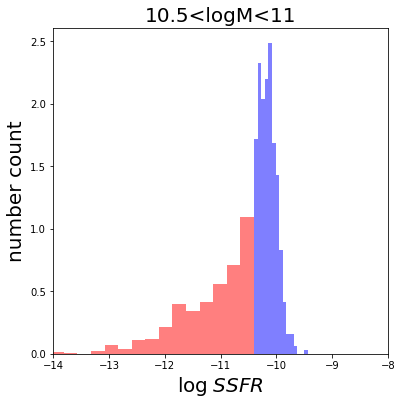

In [36]:
plt.close()
list = [[9.5,10],[10,10.5], [10.5,11]]
for i in list :
        binned_hist_median(i[0],i[1])
        